# Final Resource

## Introduction

As the sports industry continues to grow over time, the integration of advanced analytics via statistics and machine learning plays a vital role in how professional sporting teams operate and play. Is it possible to predict outcomes of sporting events given historical data, and if so, how accurately?

This report will answer the research question: *can historical data on NCAA basketball results be used to predict outcomes of future matches?* We will be using the dataset from the [Google Cloud & NCAA® ML Competition 2018-Men'](https://www.kaggle.com/c/mens-machine-learning-competition-2018) competition to build and test machine learning models. To predict the outcome of a given basketball game, our team is interested in comparing a team's recent performace (based on the last 8 games of the season) and current Elo score (a team's "rating"), against other team's recent performance and Elo score.

Our hypotheses is: *Does utilizing ELO ranking given historical accompanied with a team’s recent performance allow for us to predict if team A will beat team B in a game of basketball?* Specifically, our end result will be the probability that team A beats team B for each matchup in the 2017 March Madness tournament. We will test this by measuring the accuracy of our model to predict the outcomes of the 2017 March Madness tournament, since the seeds for 2018 have not been released. We will then use the accuracy of our results in our final evaluation.


## Dataset Overview
This dataset includes historical data from both the regular season and ncaa championship tournaments. We will only use up to 2017 regular season data, but not train the model with 2017 tournament data, as this would skew our results.

## Statistical and Machine Learning Methods 
For stat-analysis, we utilized statistical analysis to perform EDA, and utilize logistic regression models to predict trends/analyze our research question. We will also utilize ELO-Ranking as our metric for determining probabilities of winning basketball games, which will be aggregated over seasons from 1985 - 2017.

For machine learning, we plan to use either logistic regression, xgboost, or another boosting algorithm for machine learning, paired with proper cross validation / GridSearchCV.

## Set-up

In [2]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

# Load the data,
cities = pd.read_csv('./ncaa-data/Cities.csv')
conf = pd.read_csv('./ncaa-data/Conferences.csv')
confGames = pd.read_csv('./ncaa-data/ConferenceTourneyGames.csv')
gameCities = pd.read_csv('./ncaa-data/GameCities.csv')
tCompRes = pd.read_csv('./ncaa-data/NCAATourneyCompactResults.csv')
tDetRes= pd.read_csv('./ncaa-data/NCAATourneyDetailedResults.csv')
tSeedRoundSlots = pd.read_csv('./ncaa-data/NCAATourneySeedRoundSlots.csv')
tSeeds = pd.read_csv('./ncaa-data/NCAATourneySeeds.csv')
tSlots = pd.read_csv('./ncaa-data/NCAATourneySlots.csv')
regCompRes = pd.read_csv('./ncaa-data/RegularSeasonCompactResults.csv')
regDetRes = pd.read_csv('./ncaa-data/RegularSeasonDetailedResults.csv')
seasons = pd.read_csv('./ncaa-data/Seasons.csv')
secTCompRes = pd.read_csv('./ncaa-data/SecondaryTourneyCompactResults.csv')
secTTeams = pd.read_csv('./ncaa-data/SecondaryTourneyTeams.csv')
teamCoaches = pd.read_csv('./ncaa-data/TeamCoaches.csv')
teamConf = pd.read_csv('./ncaa-data/TeamConferences.csv')
teams = pd.read_csv('./ncaa-data/Teams.csv')

## Exploratory Data Analysis
### Data Overview
A brief data overview of the teams, seasons, seeds, tournament and regular season compact results and detailed results. 

In [3]:
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [4]:
seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [5]:
tSeeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [6]:
regCompRes.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [7]:
tCompRes.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [8]:
tDetRes.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [9]:
regDetRes.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [10]:
regCompRes.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000
mean,2002.127107,75.065315,1286.788737,76.673555,1282.773665,64.572848,0.045506
std,9.508740,33.383070,104.562929,12.141671,104.780202,11.376171,0.250971
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2003.000000,77.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2017.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


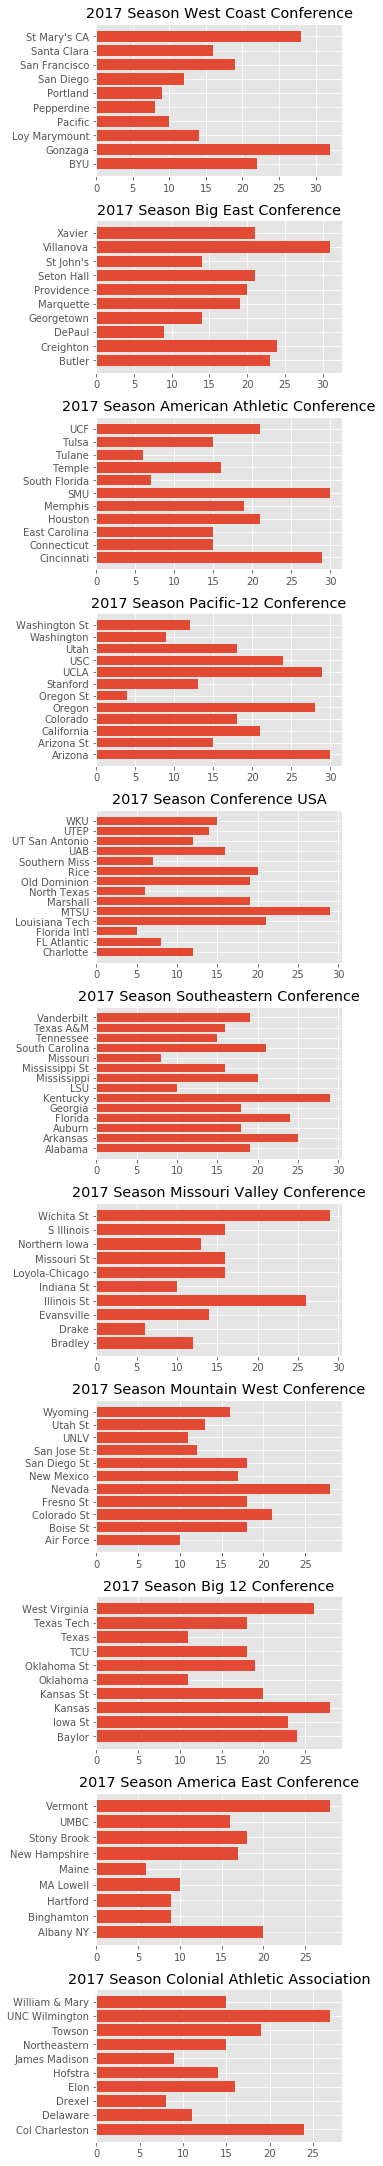

In [30]:
# Total number of wins per teamID in 2017
winsDF = regCompRes.loc[regCompRes['Season'] == 2017].groupby('WTeamID').size().to_frame().reset_index()
winsDF.columns = ["TeamID", "Wins"] # rename columns

wins_df = pd.merge(winsDF,teams,on='TeamID')
wins_df = pd.merge(wins_df, teamConf, on='TeamID')
wins_df = pd.merge(wins_df, conf, on = 'ConfAbbrev')

del wins_df['TeamID'] 
del wins_df['FirstD1Season'] 
del wins_df['LastD1Season']
del wins_df['ConfAbbrev']

wins_df = wins_df.loc[wins_df['Season'] == 2017]
wins_df= wins_df.sort_values(by=['Wins'], ascending = False)

wins_df.rename(columns={'Description':'Conference Name'}, inplace=True)


conferences = wins_df['Conference Name'].unique()
fig, axes = plt.subplots(ncols=1, nrows=11, figsize=(5,30))
for i, ax in enumerate(axes.flat):
    conf_data = wins_df.loc[wins_df['Conference Name'] == conferences[i]].dropna()
    ax.barh(conf_data['TeamName'], conf_data['Wins'])
    ax.set_title("2017 Season " + conferences[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

#print(wins_df)


# for conference in wins_df.Description.unique:
#      wins_df.loc[wins_df['Description'] == conference]
        
# plt.barh(wins_df['TeamName'], wins_df['Wins'])


<function matplotlib.pyplot.show>

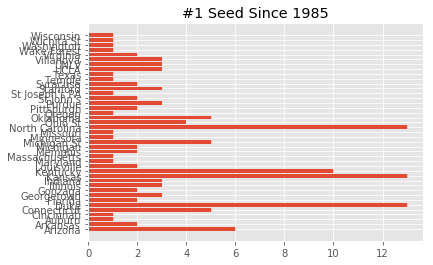

In [15]:
# Copy the original data
seed_count = tSeeds.copy(deep=True)

# Remove the region from the seed
seed_only = seed_count['Seed'].str[1:]

# Replace the old seed col with the new one without region 
seed_count['Seed'] = seed_only

# Replace all the 01 objects with an int of 1
seed_count['Seed'].replace({'01': 1}, inplace=True)

# Filter the dataframe to only show teams with #1 seed
seed_count = seed_count.loc[seed_count['Seed'] == 1]

# Count how many times a team has been #1 seed
seed_count = seed_count.groupby('TeamID').size().to_frame().reset_index()

# Replace TeamID with TeamName
seed_count = pd.merge(seed_count,teams,on='TeamID')

# Delete uneeded columns
del seed_count['FirstD1Season'] 
del seed_count['LastD1Season']
del seed_count['TeamID']

# Rename columns
seed_count.rename(columns={0:'#1 Seed Count'}, inplace=True)

# Sort by descending order
seed_count = seed_count.sort_values('#1 Seed Count', ascending=False)

seed_count

plt.barh(seed_count['TeamName'], seed_count['#1 Seed Count'])
plt.title("#1 Seed Since 1985")
plt.show

<function matplotlib.pyplot.show>

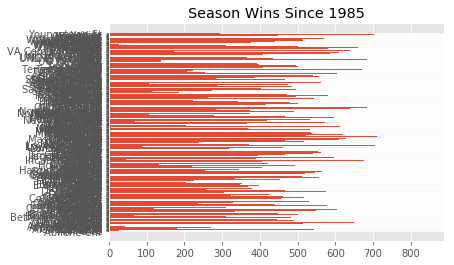

In [31]:
# Group by winning team ID to see how many times a team has won since 1985
num_wins = regCompRes.groupby('WTeamID').size().to_frame().reset_index()

# Rename WTeamID column to prep merge
num_wins.rename(columns={"WTeamID":'TeamID'}, inplace=True)

# Merge to convert TeamID to TeamName
num_wins = pd.merge(num_wins,teams,on='TeamID')

# Delete uneeded columns
del num_wins['FirstD1Season'] 
del num_wins['LastD1Season']
del num_wins['TeamID']

# Rename col to better represent number of wins
num_wins.rename(columns={0:'Wins'}, inplace=True)

# Sort by descending order
num_wins = num_wins.sort_values('Wins', ascending=False)

plt.barh(num_wins['TeamName'], num_wins['Wins'])
plt.title("Season Wins Since 1985")
plt.show